In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [48]:
mpg = sns.load_dataset('mpg')

In [49]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


##### 1) 실린더별 mpg의 평균을 막대그래프로

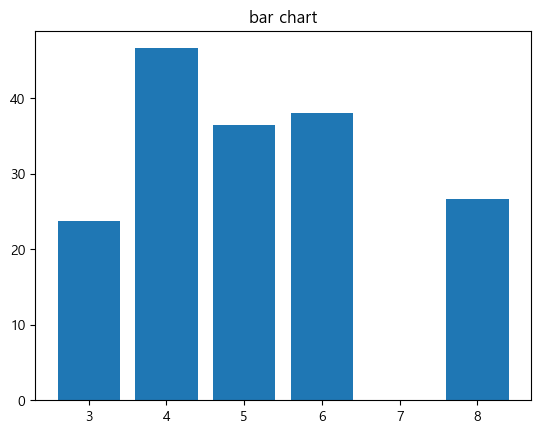

In [50]:
plt.bar(mpg['cylinders'], mpg['mpg'])
plt.title('bar chart')
plt.show()

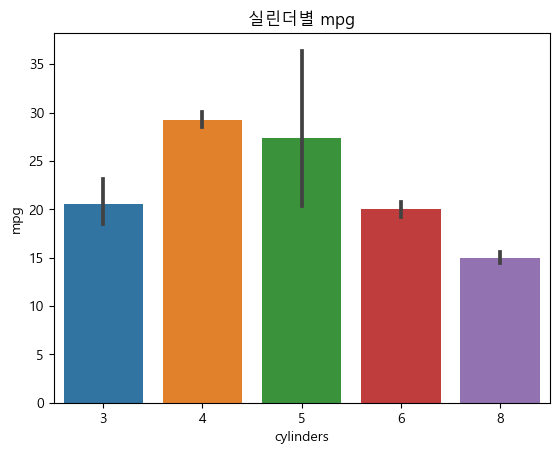

In [51]:
sns.barplot(x='cylinders',y='mpg',data=mpg)
plt.title('실린더별 mpg');

In [52]:
dt1 = mpg[['cylinders','mpg']].groupby('cylinders').mean()
dt1.head()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


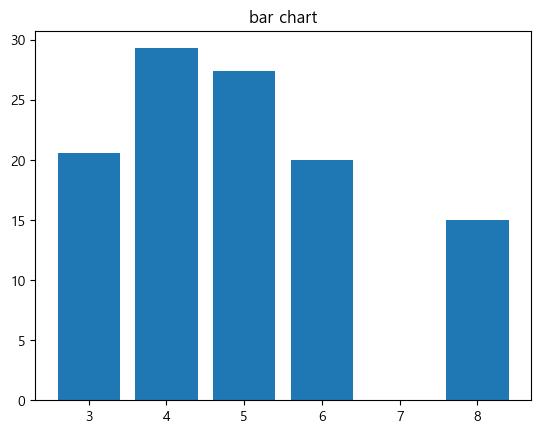

In [53]:
plt.bar(dt1.index, dt1.mpg)
plt.title('bar chart')
plt.show()

##### 2) 배기량과 마력의 산점도

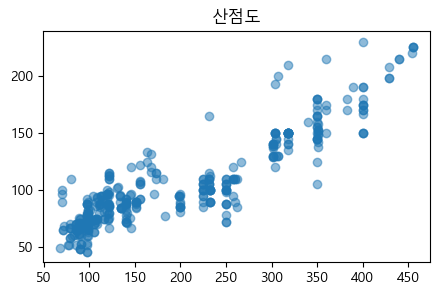

In [54]:
X = mpg['displacement']
Y = mpg['horsepower']
plt.figure(figsize=(5,3))
plt.scatter(X,Y,alpha=0.5)
plt.title('산점도')
plt.show()

##### 3) name 컬럼에서 제조사 추출

In [55]:
mpg['manufacturer']=mpg.name.apply(lambda x: x.split()[0])
mpg['manufacturer'].head()

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: manufacturer, dtype: object

In [56]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


##### 4) 
- 제조사별 모델의 개수 top10을 막대그래프로
- 제조사별 mpg의 평균 top10을 막대그래프로

In [57]:
dt2 = mpg[['manufacturer','name']].groupby('manufacturer').count()
dt2.head(3)

,name
manufacturer,
amc,28
audi,7
bmw,2


In [58]:
sv1 = dt2.sort_values(by='name', ascending=False)
sv1.head(3)

,name
manufacturer,
ford,51
chevrolet,43
plymouth,31


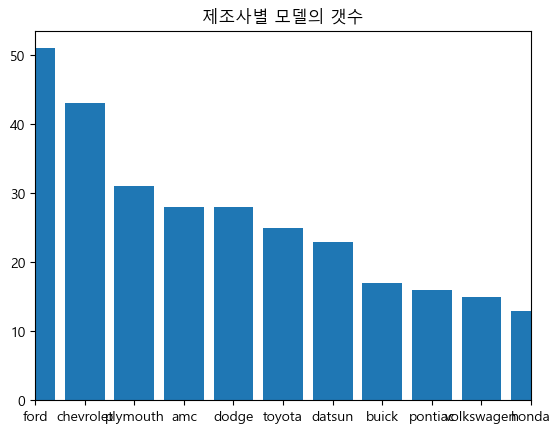

In [59]:
plt.bar(sv1.index,sv1.name)
plt.xlim([0, 10])
plt.title('제조사별 모델의 갯수');

In [60]:
sv2 = mpg.sort_values(by='mpg', ascending=False)
sv2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,mazda
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl,honda
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),vw
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),vw
...,...,...,...,...,...,...,...,...,...,...
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala,chevrolet
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis,mercury
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20,chevy


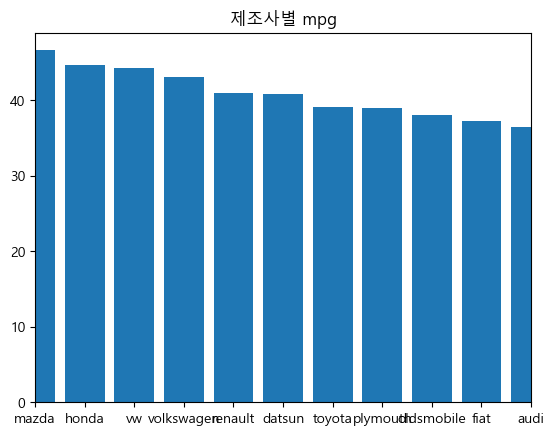

In [61]:
plt.bar(sv2['manufacturer'],sv2['mpg'])
plt.xlim([0, 10])
plt.title('제조사별 mpg');

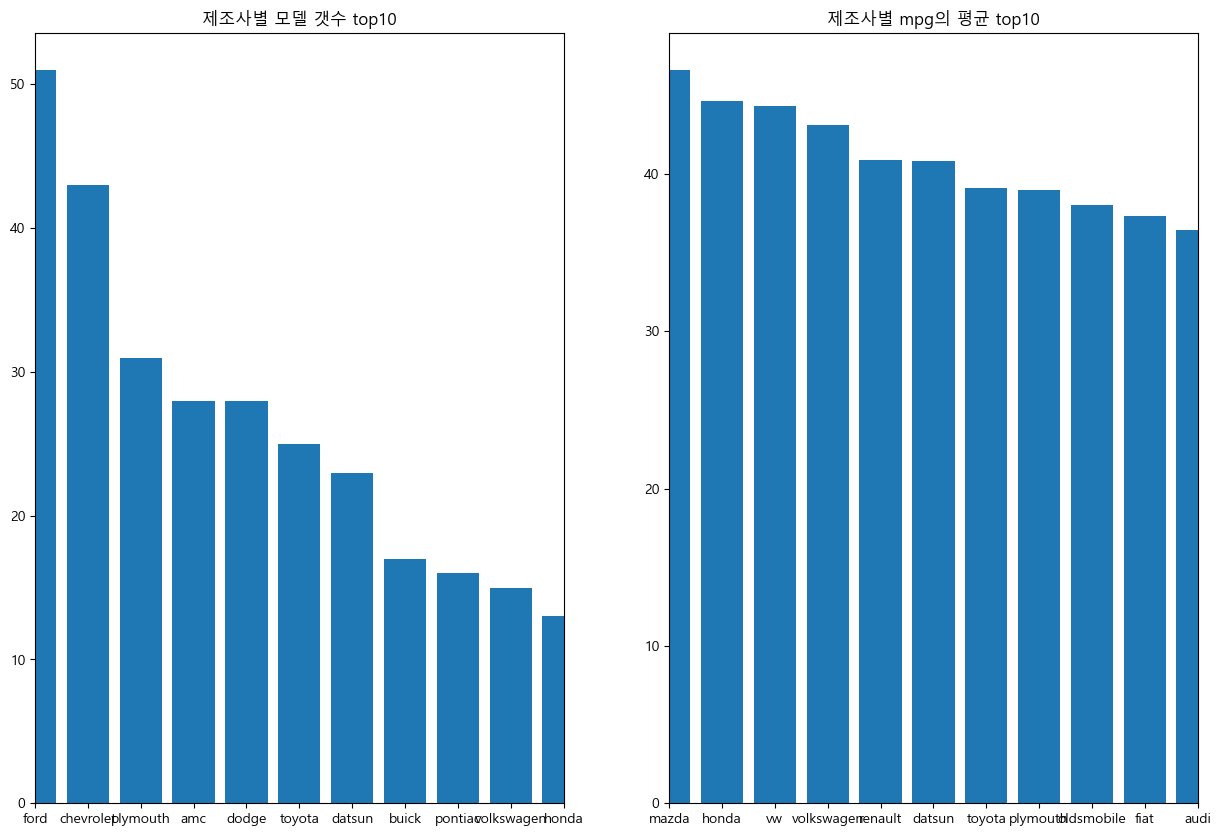

In [62]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.bar(sv1.index,sv1.name)
plt.xlim([0, 10])
plt.title('제조사별 모델 갯수 top10')

plt.subplot(1,2,2)
plt.bar(sv2['manufacturer'],sv2['mpg'])
plt.xlim([0, 10])
plt.title('제조사별 mpg의 평균 top10')

plt.show()